In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [8]:
base_model = keras.applications.VGG16(include_top=False, weights='imagenet')
base_model.trainable = False

model_input = keras.Input(shape=(224, 224, 3))
x = base_model(model_input, training=False)
x = keras.layers.Convolution2D(1, 2, 2, activation='relu', name='newconv_1')(x)
x = keras.layers.Flatten()(x)

model = keras.Model(model_input, x)
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 newconv_1 (Conv2D)          (None, 3, 3, 1)           2049      
                                                                 
 flatten_5 (Flatten)         (None, 9)                 0         
                                                                 
Total params: 14,716,737
Trainable params: 2,049
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [23]:
import pandas

ANIME_PATH = '/Users/devon/Desktop/personai_icartoonface_dettrain'

df = pandas.read_csv(ANIME_PATH + '/icartoonface_dettrain.csv', 
    names=['file', 'x1', 'y1', 'x2', 'y2'])


In [28]:
def get_bbox(row):
    return (row['x1'], row['y1'], row['x2'] - row['x1'], row['y2'] - row['y1'])

bbox_dict = {}
for idx, row in df.iterrows():
    fname = row['file']
    if fname in bbox_dict:
        bbox_dict[fname].append(get_bbox(row))
    else:
        bbox_dict[fname] = [get_bbox(row)]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [45]:
k = list(bbox_dict.keys())
print(k[100], ':', bbox_dict[k[100]])
print('# images:', len(k))

personai_icartoonface_dettrain_00225.jpg : [(346, 206, 64, 82), (6, 46, 44, 85)]
# images: 50000
                 x1            y1            x2            y2
count  91163.000000  91163.000000  91163.000000  91163.000000
mean     305.272007    181.903788    412.470311    291.527593
std      187.467248    133.157959    202.493305    141.489490
min        0.000000      0.000000     12.000000     14.000000
25%      170.000000     98.000000    266.000000    203.000000
50%      284.000000    158.000000    404.000000    282.000000
75%      413.000000    237.000000    540.000000    363.000000
max     4569.000000   3543.000000   5000.000000   3945.000000


In [61]:
arr = df.to_numpy()
W = arr[:,3] - arr[:,1]
H = arr[:,4] - arr[:,2]
print(np.sum(W > 25))
print(np.sum(H > 25))

82561
84190


In [75]:
import sys
import importlib
import datagen
importlib.reload(datagen)

import matplotlib.pyplot as plt


gen = datagen.CartoonDataGenerator(ANIME_PATH)

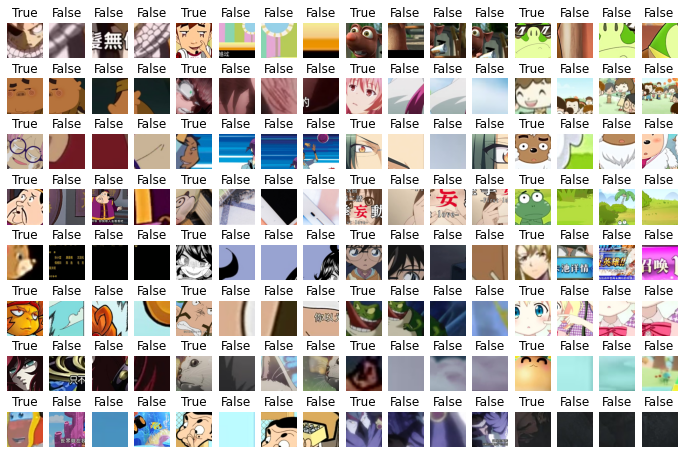

In [88]:
f, axarr = plt.subplots(8, 16, figsize=(12, 8))
axarr = axarr.ravel()

X, y = gen.__getitem__(100)
for i in range(128):
    axarr[i].imshow(X[i, ...])
    axarr[i].set_title(str(y[i]))
    axarr[i].set_axis_off()